In [51]:

import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.io.img_tiles import Stamen, GoogleTiles
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import netCDF4 as nc
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.patheffects import Stroke
import array as arr
import seaborn as sns
import shapely.geometry as sgeom
import datetime
from scipy import interpolate
import cmocean

In [66]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

plt.rcParams['font.size']= 13
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['axes.labelsize'] = 13

In [67]:
import cartopy.feature as cfeature
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor=cfeature.COLORS['land'])
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])

# Load SG data

In [78]:
# Load Seaglider 644
fname_sg644 = glob.glob('D:/PolarFront2022/2022-05/seaglider/2022_polarfront_seaglider_sg644/netcdf/p*.nc')

dive_number_644 = np.zeros((0))
time_644 = np.zeros((0))
lat_644 = np.zeros((0))
lon_644 = np.zeros((0))
temp_644 = np.zeros((0))
sal_644 = np.zeros((0))

for ind in np.arange(len(fname_sg644)):
    sg_644 = nc.Dataset(fname_sg644[ind])
    dive_number_644 = np.append(dive_number_644, sg_644.dive_number)
    time_644 = np.append(time_644, sg_644.time_coverage_start)
    lat_644 = np.append(lat_644, sg_644.variables['latitude'][0])
    lon_644 = np.append(lon_644, sg_644.variables['longitude'][0])
    sal_644 = np.append(sal_644, sg_644.variables['salinity'][0])
    temp_644 = np.append(temp_644, sg_644.variables['temperature'][0])
    
    
    

In [75]:
sg_644

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    quality_control_version: 1.12
    base_station_micro_version: 4475
    time_coverage_resolution: PT1S
    geospatial_vertical_max: 103.87450531177585
    mission: 11
    geospatial_lat_units: degrees
    geospatial_lon_units: degrees
    references: http://data.nodc.noaa.gov/accession/0092291
    seaglider_software_version: 66.12
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    keywords: Water Temperature, Conductivity, Salinity, Density, Potential Density, Potential Temperature
    summary: SG644 SG644_PolarFront_20220519
    id: p6440006_20220520
    naming_authority: edu.washington.apl
    project: SG644_PolarFront_20220519
    geospatial_lat_max: 74.99549365117063
    uuid: 611dba9e-d7df-11ec-bdc9-c81f660ad1ec
    source: Seaglider SG644
    standard_name_vocabulary: CF-1.6
    file_version: 2.71
    glider: 644
    platform: glider
    instrument: magnetometer sbe41 con

In [11]:
# Load Seaglider 153
fname_sg153 = glob.glob('D:/PolarFront2022/2022-05/seaglider/2022_polarfront_seaglider_sg153/netcdf/p*.nc')


lat_153 = np.zeros((0))
lon_153 = np.zeros((0))


for ind in np.arange(len(fname_sg153)):
    sg_153 = nc.Dataset(fname_sg153[ind])
    

    lat_153 = np.append(lat_153, sg_153.variables['latitude'][0])
    lon_153 = np.append(lon_153, sg_153.variables['longitude'][0])

    
    

In [12]:
fname_sg153

['D:/PolarFront2022/2022-05/seaglider/2022_polarfront_seaglider_sg153/netcdf\\p1530004.nc',
 'D:/PolarFront2022/2022-05/seaglider/2022_polarfront_seaglider_sg153/netcdf\\p1530001.nc',
 'D:/PolarFront2022/2022-05/seaglider/2022_polarfront_seaglider_sg153/netcdf\\p1530002.nc',
 'D:/PolarFront2022/2022-05/seaglider/2022_polarfront_seaglider_sg153/netcdf\\p1530005.nc',
 'D:/PolarFront2022/2022-05/seaglider/2022_polarfront_seaglider_sg153/netcdf\\p1530003.nc']

# Load bathymetry

In [15]:
BS_topo = nc.Dataset("C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/BarentsSeaBathy.nc")

In [16]:
lat_lim = [70, 80]
lon_lim = [5, 45]

lat_lim_index = (BS_topo.variables['lat'][:].data>lat_lim[0]) & (BS_topo.variables['lat'][:].data<lat_lim[1])
lon_lim_index = (BS_topo.variables['lon'][:].data>lon_lim[0]) & (BS_topo.variables['lon'][:].data<lon_lim[1])

lats = BS_topo.variables['lat'][:].data[lat_lim_index]
lons = BS_topo.variables['lon'][:].data[lon_lim_index]
bathy_lat = BS_topo.variables['elevation'][:].data[lat_lim_index,:]
bathy = bathy_lat[:,lon_lim_index]*-1
bathy[bathy < 0] = 1 

# Plot trajectory

C:\Users\mbd\anaconda3\envs\phd-env\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\mbd\anaconda3\envs\phd-env\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\mbd\anaconda3\envs\phd-env\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


2022-05-20T22:05:43Z
2022-05-21T00:05:49Z
2022-05-21T02:05:45Z
2022-05-22T16:05:59Z
2022-05-22T18:05:56Z
2022-05-22T20:05:18Z
2022-05-23T18:05:45Z
2022-05-23T20:05:03Z
2022-05-23T22:05:06Z


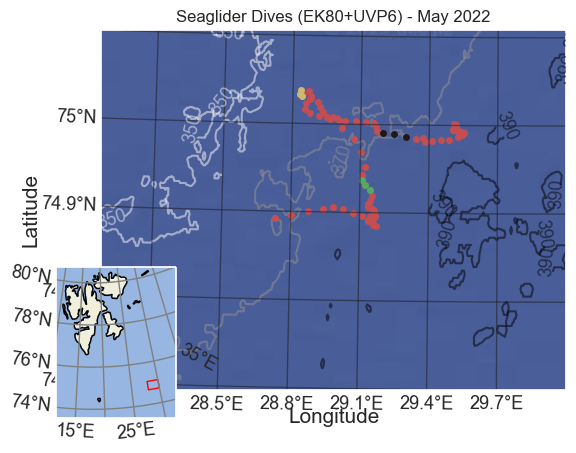

In [79]:
fig   = plt.figure(figsize=(6,8))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = 30, central_latitude = 75)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent=[28, 30, 74.7, 75.1]
ax.set_extent(extent, crs = ccrs.PlateCarree())


# Add the Stamen aerial imagery at zoom level 7.
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

cs = ax.contour(lons,lats,bathy, levels=[350, 370, 390], cmap='Greys', alpha = 0.5, transform=ccrs.PlateCarree())
plt.clabel(cs)

# Add transects 2021
plt.plot(lon_644,lat_644,'r.', markersize=8, transform=ccrs.PlateCarree())

# Plot selected dives in color
set_1 = [22,23,24]
set_2 = [43,44,45]
set_3 = [56,57,58]
c_dive = ['k.', 'y.', 'g.']
i=0
for dives in [set_1,set_2,set_3]:
    for i_dive in dives:
        ind = np.where(dive_number_644==i_dive)[0][0]
        print(time_644[ind])
        plt.plot(lon_644[ind],lat_644[ind],c_dive[i], markersize=8, transform=ccrs.PlateCarree())
    i+=1

# Add axes labels

ax.text(-.13, 0.50, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=15)
ax.text(0.5, -.10, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=15)
plt.title('Seaglider Dives (EK80+UVP6) - May 2022')

## ---------------------------
# Create an inset GeoAxes showing the location.
#sub_ax = fig.add_axes([0.1, 0.05, 0.3, 0.3],

sub_proj = ccrs.Orthographic(central_longitude = 18, central_latitude = 76)
sub_ax = fig.add_axes([0.05, 0.23, 0.20, 0.2],
                    projection = sub_proj)
sub_ax.set_extent([11.8, 32, 73.5, 80.5])


#fig = plt.figure(figsize=(15,10))
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                    edgecolor='face',
                                    facecolor=cfeature.COLORS['water'])
# Make a nice border around the inset axes.
effect = Stroke(linewidth=4, foreground='wheat', alpha=0.5)
#sub_ax.spines['geo'].set_path_effects([effect])

# Add the land, coastlines and the extent of domain.
sub_ax.add_feature(land_50m)
sub_ax.add_feature(ocean_50m)
sub_ax.coastlines(resolution='50m')
sub_ax.add_feature(cfeature.BORDERS)

#sub_ax.text(15, 78.81, 'Svalbard', transform=ccrs.PlateCarree(), fontsize=13, color = 'k')

extent_box = sgeom.box(extent[0], extent[2], extent[1], extent[3])
sub_ax.add_geometries([extent_box], ccrs.PlateCarree(), facecolor='none',
                      edgecolor='red', linewidth=1)
gl_sub = sub_ax.gridlines(color='grey', draw_labels=True, x_inline=False)
gl_sub.top_labels  = False
gl_sub.left_labels = True
gl_sub.right_labels = False

gl_sub.xlocator = mticker.FixedLocator([10,15,20,25,30,35])
gl_sub.ylocator = mticker.FixedLocator([74,76,78,80])


##fig.savefig('PF_SB_transects.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

## Plot hydrographic results

In [75]:
#SG_644 & SG_153 In matlab -> sg_vis.m